In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import yfinance as yf 


In [2]:
import pandas as pd

file_path = r'C:\Users\matti\OneDrive - Scientific Network South Tyrol\UNIBZ\Laurea Magistrale\Econometria\Project\Python\Econometrics\EMM_EPMR_PTE_NUS_DPGm.xls'

# Read the Excel file into a pandas DataFrame, skip the first two rows and use the third row as header
df = pd.read_excel(file_path, skiprows=3, header=None, names=['DATE', 'Gasoline_Price'])
# Convert the 'Date' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])
df['DATE'] = df['DATE'].dt.to_period('M').dt.to_timestamp()

# Change the date format
df['DATE'] = df['DATE'].dt.strftime('%Y-%m-%d')

# Set the 'Date' column as the DataFrame index
df.set_index('DATE', inplace=True)

# Filter the DataFrame based on the specified start and end dates
start_date = "1997-01-01"
end_date = "2023-05-01"
df_gasoline = df.loc[start_date:end_date]
df_gasoline.reset_index(inplace=True)

# Now df_gasoline has the 'DATE' column in the desired format
df_gasoline


,DATE,Gasoline_Price
0,1997-01-01,1.236
1,1997-02-01,1.230
2,1997-03-01,1.205
3,1997-04-01,1.199
4,1997-05-01,1.200
...,...,...
312,2023-01-01,3.339
313,2023-02-01,3.389
314,2023-03-01,3.422
315,2023-04-01,3.603


In [3]:
df_uranium = pd.read_csv(r"C:\Users\matti\OneDrive - Scientific Network South Tyrol\UNIBZ\Laurea Magistrale\Econometria\Project\Python\Econometrics\PURANUSDM.csv") # Uranium Price
df_fed_rate = pd.read_csv(r"C:\Users\matti\OneDrive - Scientific Network South Tyrol\UNIBZ\Laurea Magistrale\Econometria\Project\Python\Econometrics\FEDFUNDS.csv") # Fed Rate
df_oil = pd.read_csv(r"C:\Users\matti\OneDrive - Scientific Network South Tyrol\UNIBZ\Laurea Magistrale\Econometria\Project\Python\Econometrics\POILBREUSDM.csv") # Oil
df_coal = pd.read_csv(r"C:\Users\matti\OneDrive - Scientific Network South Tyrol\UNIBZ\Laurea Magistrale\Econometria\Project\Python\Econometrics\PCOALAUUSDM.csv") # Coal
df_cpi = pd.read_csv(r"C:\Users\matti\OneDrive - Scientific Network South Tyrol\UNIBZ\Laurea Magistrale\Econometria\Project\Python\Econometrics\CPIAUCSL.csv") # CPI
df_gdp= pd.read_csv(r"C:\Users\matti\OneDrive - Scientific Network South Tyrol\UNIBZ\Laurea Magistrale\Econometria\Project\Python\Econometrics\USALORSGPNOSTSAM.csv")#GDP
df_electricity_price= pd.read_csv(r"C:\Users\matti\OneDrive - Scientific Network South Tyrol\UNIBZ\Laurea Magistrale\Econometria\Project\Python\Econometrics\APU000072610.csv")#electricity price
df_natural_gas_price = pd.read_csv(r"C:\Users\matti\OneDrive - Scientific Network South Tyrol\UNIBZ\Laurea Magistrale\Econometria\Project\Python\Econometrics\MHHNGSP.csv")#natural gas price

In [4]:
df_natural_gas_price

,DATE,MHHNGSP
0,1997-01-01,3.45
1,1997-02-01,2.15
2,1997-03-01,1.89
3,1997-04-01,2.03
4,1997-05-01,2.25
...,...,...
317,2023-06-01,2.18
318,2023-07-01,2.55
319,2023-08-01,2.58
320,2023-09-01,2.64


In [5]:
# df_uranium, df_fed_rate, df_oil, df_coal, df_cpi, df_gdp, df_electricity_price, df_natural_gas_price

# Create a list of the DataFrames to join
dfs_to_join = [df_uranium, df_fed_rate, df_oil, df_coal, df_cpi, df_gdp, df_electricity_price, df_natural_gas_price,df_gasoline]

# Perform inner join on 'DATE' column
merged_df = dfs_to_join[0]  # Start with the first DataFrame
for df in dfs_to_join[1:]:
    merged_df = merged_df.merge(df, on='DATE', how='inner')

# The resulting merged_df will contain all the columns from the DataFrames joined on 'DATE'.
merged_df

,DATE,PURANUSDM,FEDFUNDS,POILBREUSDM,PCOALAUUSDM,CPIAUCSL,USALORSGPNOSTSAM,APU000072610,MHHNGSP,Gasoline_Price
0,1997-01-01,14.487500,5.25,23.605652,35.230000,159.400,99.556129,0.092,3.45,1.236
1,1997-02-01,13.810000,5.19,20.920500,34.600000,159.700,99.582127,0.092,2.15,1.230
2,1997-03-01,13.620000,5.39,19.559524,34.500000,159.800,99.643634,0.093,1.89,1.205
3,1997-04-01,12.825000,5.51,17.775455,35.400000,159.900,99.730817,0.092,2.03,1.199
4,1997-05-01,11.827778,5.50,19.245455,35.730000,159.900,99.826738,0.093,2.25,1.200
...,...,...,...,...,...,...,...,...,...,...
312,2023-01-01,40.063400,4.33,84.081818,404.535204,300.536,99.860089,0.168,3.27,3.339
313,2023-02-01,41.314371,4.57,83.632500,244.205357,301.648,99.885841,0.168,2.38,3.389
314,2023-03-01,40.741523,4.65,79.256522,195.999224,301.808,99.906923,0.166,2.31,3.422
315,2023-04-01,41.762017,4.83,83.536000,200.676190,302.918,99.925322,0.165,2.16,3.603


In [6]:
merged_df = merged_df.rename(columns={
    'DATE': 'Date',
    'PURANUSDM': 'uranium',
    'FEDFUNDS': 'fed_rate',
    'POILBREUSDM': 'brent',
    'PCOALAUUSDM': 'coal',
    'CPIAUCSL': 'cpi',
    'APU000072610': 'electricity_price',
    'USALORSGPNOSTSAM': 'gdp',
    'MHHNGSP': 'natural_gas_price'
})
merged_df

,Date,uranium,fed_rate,brent,coal,cpi,gdp,electricity_price,natural_gas_price,Gasoline_Price
0,1997-01-01,14.487500,5.25,23.605652,35.230000,159.400,99.556129,0.092,3.45,1.236
1,1997-02-01,13.810000,5.19,20.920500,34.600000,159.700,99.582127,0.092,2.15,1.230
2,1997-03-01,13.620000,5.39,19.559524,34.500000,159.800,99.643634,0.093,1.89,1.205
3,1997-04-01,12.825000,5.51,17.775455,35.400000,159.900,99.730817,0.092,2.03,1.199
4,1997-05-01,11.827778,5.50,19.245455,35.730000,159.900,99.826738,0.093,2.25,1.200
...,...,...,...,...,...,...,...,...,...,...
312,2023-01-01,40.063400,4.33,84.081818,404.535204,300.536,99.860089,0.168,3.27,3.339
313,2023-02-01,41.314371,4.57,83.632500,244.205357,301.648,99.885841,0.168,2.38,3.389
314,2023-03-01,40.741523,4.65,79.256522,195.999224,301.808,99.906923,0.166,2.31,3.422
315,2023-04-01,41.762017,4.83,83.536000,200.676190,302.918,99.925322,0.165,2.16,3.603


In [7]:
ticker_symbol = "DX-Y.NYB"  # Replace with the symbol of the stock you're interested in

ticker = yf.Ticker(ticker_symbol)

start_date = "1997-01-01"
end_date = "2023-05-01"

historical_data = ticker.history(start=start_date, end=end_date, interval="1mo")

# Extract the 'Close' prices
df_usd_index = historical_data[['Close']].copy()

# Reset the index to use the default integer index
df_usd_index.reset_index(inplace=True)

# Convert the 'Date' column to the desired format "YYYY-MM-DD"
df_usd_index['Date'] = df_usd_index['Date'].dt.strftime('%Y-%m-%d')
df_usd_index.rename(columns={'Close': 'close_USD_index'}, inplace=True)

# Display the modified df_usd_index
df_usd_index

,Date,close_USD_index
0,1997-01-01,93.040001
1,1997-02-01,94.889999
2,1997-03-01,94.720001
3,1997-04-01,97.180000
4,1997-05-01,94.849998
...,...,...
311,2022-12-01,103.519997
312,2023-01-01,102.099998
313,2023-02-01,104.870003
314,2023-03-01,102.510002


In [8]:
# Merge df_usd_index with merged_df on 'DATE' and 'Date' columns
result_df = merged_df.merge(df_usd_index, on='Date', how='inner')

# Display the merged DataFrame
result_df


,Date,uranium,fed_rate,brent,coal,cpi,gdp,electricity_price,natural_gas_price,Gasoline_Price,close_USD_index
0,1997-01-01,14.487500,5.25,23.605652,35.230000,159.400,99.556129,0.092,3.45,1.236,93.040001
1,1997-02-01,13.810000,5.19,20.920500,34.600000,159.700,99.582127,0.092,2.15,1.230,94.889999
2,1997-03-01,13.620000,5.39,19.559524,34.500000,159.800,99.643634,0.093,1.89,1.205,94.720001
3,1997-04-01,12.825000,5.51,17.775455,35.400000,159.900,99.730817,0.092,2.03,1.199,97.180000
4,1997-05-01,11.827778,5.50,19.245455,35.730000,159.900,99.826738,0.093,2.25,1.200,94.849998
...,...,...,...,...,...,...,...,...,...,...,...
311,2022-12-01,39.178244,4.10,81.503182,427.686964,298.990,99.828562,0.165,5.53,3.210,103.519997
312,2023-01-01,40.063400,4.33,84.081818,404.535204,300.536,99.860089,0.168,3.27,3.339,102.099998
313,2023-02-01,41.314371,4.57,83.632500,244.205357,301.648,99.885841,0.168,2.38,3.389,104.870003
314,2023-03-01,40.741523,4.65,79.256522,195.999224,301.808,99.906923,0.166,2.31,3.422,102.510002


In [9]:
#^GSPC  S&P 500
#it also includes : Renewable Energy Generation Index (REGI)
ticker_symbol = "^GSPC"  # Replace with the symbol of the stock you're interested in

ticker = yf.Ticker(ticker_symbol)

start_date = "1997-01-01"
end_date = "2023-05-01"

historical_data = ticker.history(start=start_date, end=end_date, interval="1mo")

df_sp500 = historical_data[['Close']].copy()
# Reset the index to use the default integer index
df_sp500.reset_index(inplace=True)
# Convert the 'Date' column to the desired format "YYYY-MM-DD"
df_sp500['Date'] = df_sp500['Date'].dt.strftime('%Y-%m-%d')

df_sp500.rename(columns={'Close': 'close_sp500'}, inplace=True)
df_sp500

,Date,close_sp500
0,1997-01-01,786.159973
1,1997-02-01,790.820007
2,1997-03-01,757.119995
3,1997-04-01,801.340027
4,1997-05-01,848.280029
...,...,...
311,2022-12-01,3839.500000
312,2023-01-01,4076.600098
313,2023-02-01,3970.149902
314,2023-03-01,4109.310059


In [10]:
# Merge df_usd_index with merged_df on 'DATE' and 'Date' columns
df_final = result_df.merge(df_sp500, on='Date', how='inner')

# Display the merged DataFrame
df_final

,Date,uranium,fed_rate,brent,coal,cpi,gdp,electricity_price,natural_gas_price,Gasoline_Price,close_USD_index,close_sp500
0,1997-01-01,14.487500,5.25,23.605652,35.230000,159.400,99.556129,0.092,3.45,1.236,93.040001,786.159973
1,1997-02-01,13.810000,5.19,20.920500,34.600000,159.700,99.582127,0.092,2.15,1.230,94.889999,790.820007
2,1997-03-01,13.620000,5.39,19.559524,34.500000,159.800,99.643634,0.093,1.89,1.205,94.720001,757.119995
3,1997-04-01,12.825000,5.51,17.775455,35.400000,159.900,99.730817,0.092,2.03,1.199,97.180000,801.340027
4,1997-05-01,11.827778,5.50,19.245455,35.730000,159.900,99.826738,0.093,2.25,1.200,94.849998,848.280029
...,...,...,...,...,...,...,...,...,...,...,...,...
311,2022-12-01,39.178244,4.10,81.503182,427.686964,298.990,99.828562,0.165,5.53,3.210,103.519997,3839.500000
312,2023-01-01,40.063400,4.33,84.081818,404.535204,300.536,99.860089,0.168,3.27,3.339,102.099998,4076.600098
313,2023-02-01,41.314371,4.57,83.632500,244.205357,301.648,99.885841,0.168,2.38,3.389,104.870003,3970.149902
314,2023-03-01,40.741523,4.65,79.256522,195.999224,301.808,99.906923,0.166,2.31,3.422,102.510002,4109.310059


In [11]:
local_file_path = r"C:\Users\matti\OneDrive - Scientific Network South Tyrol\UNIBZ\Laurea Magistrale\Econometria\Project\Python\Econometrics\df_final.csv"

# Save the DataFrame as a CSV file
df_final.to_csv(local_file_path, index=False)

print("CSV file saved successfully.")

CSV file saved successfully.


In [12]:
df_final.set_index('Date', inplace=True)
df_final

,uranium,fed_rate,brent,coal,cpi,gdp,electricity_price,natural_gas_price,Gasoline_Price,close_USD_index,close_sp500
Date,,,,,,,,,,,
1997-01-01,14.487500,5.25,23.605652,35.230000,159.400,99.556129,0.092,3.45,1.236,93.040001,786.159973
1997-02-01,13.810000,5.19,20.920500,34.600000,159.700,99.582127,0.092,2.15,1.230,94.889999,790.820007
1997-03-01,13.620000,5.39,19.559524,34.500000,159.800,99.643634,0.093,1.89,1.205,94.720001,757.119995
1997-04-01,12.825000,5.51,17.775455,35.400000,159.900,99.730817,0.092,2.03,1.199,97.180000,801.340027
1997-05-01,11.827778,5.50,19.245455,35.730000,159.900,99.826738,0.093,2.25,1.200,94.849998,848.280029
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,39.178244,4.10,81.503182,427.686964,298.990,99.828562,0.165,5.53,3.210,103.519997,3839.500000
2023-01-01,40.063400,4.33,84.081818,404.535204,300.536,99.860089,0.168,3.27,3.339,102.099998,4076.600098
2023-02-01,41.314371,4.57,83.632500,244.205357,301.648,99.885841,0.168,2.38,3.389,104.870003,3970.149902


In [13]:
# Assuming df_final is your DataFrame
df_final['uranium'] = pd.to_numeric(df_final['uranium'], errors='coerce')
df_final

,uranium,fed_rate,brent,coal,cpi,gdp,electricity_price,natural_gas_price,Gasoline_Price,close_USD_index,close_sp500
Date,,,,,,,,,,,
1997-01-01,14.487500,5.25,23.605652,35.230000,159.400,99.556129,0.092,3.45,1.236,93.040001,786.159973
1997-02-01,13.810000,5.19,20.920500,34.600000,159.700,99.582127,0.092,2.15,1.230,94.889999,790.820007
1997-03-01,13.620000,5.39,19.559524,34.500000,159.800,99.643634,0.093,1.89,1.205,94.720001,757.119995
1997-04-01,12.825000,5.51,17.775455,35.400000,159.900,99.730817,0.092,2.03,1.199,97.180000,801.340027
1997-05-01,11.827778,5.50,19.245455,35.730000,159.900,99.826738,0.093,2.25,1.200,94.849998,848.280029
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,39.178244,4.10,81.503182,427.686964,298.990,99.828562,0.165,5.53,3.210,103.519997,3839.500000
2023-01-01,40.063400,4.33,84.081818,404.535204,300.536,99.860089,0.168,3.27,3.339,102.099998,4076.600098
2023-02-01,41.314371,4.57,83.632500,244.205357,301.648,99.885841,0.168,2.38,3.389,104.870003,3970.149902


In [14]:
df_final = df_final.dropna(subset=['uranium'])
df_final

,uranium,fed_rate,brent,coal,cpi,gdp,electricity_price,natural_gas_price,Gasoline_Price,close_USD_index,close_sp500
Date,,,,,,,,,,,
1997-01-01,14.487500,5.25,23.605652,35.230000,159.400,99.556129,0.092,3.45,1.236,93.040001,786.159973
1997-02-01,13.810000,5.19,20.920500,34.600000,159.700,99.582127,0.092,2.15,1.230,94.889999,790.820007
1997-03-01,13.620000,5.39,19.559524,34.500000,159.800,99.643634,0.093,1.89,1.205,94.720001,757.119995
1997-04-01,12.825000,5.51,17.775455,35.400000,159.900,99.730817,0.092,2.03,1.199,97.180000,801.340027
1997-05-01,11.827778,5.50,19.245455,35.730000,159.900,99.826738,0.093,2.25,1.200,94.849998,848.280029
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,39.178244,4.10,81.503182,427.686964,298.990,99.828562,0.165,5.53,3.210,103.519997,3839.500000
2023-01-01,40.063400,4.33,84.081818,404.535204,300.536,99.860089,0.168,3.27,3.339,102.099998,4076.600098
2023-02-01,41.314371,4.57,83.632500,244.205357,301.648,99.885841,0.168,2.38,3.389,104.870003,3970.149902


# STANDARDIZATION of the DATAFRAME

In [15]:
from sklearn.preprocessing import StandardScaler

# Extract the numeric columns for standardization (excluding 'Date')
numeric_columns = df_final.columns[1:]

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
df_final_standardized = df_final.copy()  # Make a copy of the original DataFrame
df_final_standardized[numeric_columns] = scaler.fit_transform(df_final[numeric_columns])

# Now, df_final_standardized contains the standardized data
df_final_standardized

,uranium,fed_rate,brent,coal,cpi,gdp,electricity_price,natural_gas_price,Gasoline_Price,close_USD_index,close_sp500
Date,,,,,,,,,,,
1997-01-01,14.487500,1.496955,-1.160983,-0.668625,-1.598572,-0.336088,-1.227733,-0.364038,-1.356803,0.051590,-1.058083
1997-02-01,13.810000,1.468498,-1.245820,-0.677017,-1.590278,-0.313841,-1.227733,-0.966174,-1.363700,0.220136,-1.053288
1997-03-01,13.620000,1.563357,-1.288820,-0.678350,-1.587514,-0.261210,-1.182336,-1.086601,-1.392438,0.204648,-1.087958
1997-04-01,12.825000,1.620272,-1.345188,-0.666360,-1.584749,-0.186608,-1.227733,-1.021756,-1.399335,0.428768,-1.042466
1997-05-01,11.827778,1.615529,-1.298743,-0.661964,-1.584749,-0.104529,-1.182336,-0.919856,-1.398186,0.216492,-0.994176
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,39.178244,0.951516,0.668292,4.559405,2.260402,-0.102968,2.086255,0.599381,0.912341,1.006379,2.083089
2023-01-01,40.063400,1.060604,0.749764,4.250994,2.303142,-0.075990,2.222446,-0.447410,1.060628,0.877009,2.327009
2023-02-01,41.314371,1.174435,0.735568,2.115195,2.333883,-0.053954,2.222446,-0.859642,1.118104,1.129373,2.217497


In [16]:
print(df_final_standardized.describe())

          uranium      fed_rate         brent          coal           cpi  \
count  316.000000  3.160000e+02  3.160000e+02  3.160000e+02  3.160000e+02   
mean    32.276059  8.994212e-17 -1.798842e-16  1.349132e-16  2.698264e-16   
std     21.317264  1.001586e+00  1.001586e+00  1.001586e+00  1.001586e+00   
min      7.100000 -9.693774e-01 -1.585798e+00 -8.182230e-01 -1.598572e+00   
25%     13.087500 -9.219479e-01 -9.362978e-01 -6.630633e-01 -9.088277e-01   
50%     29.643182 -3.859949e-01 -5.830189e-02 -2.232306e-01  6.928850e-03   
75%     41.983333  1.023846e+00  6.463980e-01  1.958442e-01  6.660355e-01   
max    136.222222  2.108795e+00  2.313826e+00  5.093545e+00  2.368992e+00   

                gdp  electricity_price  natural_gas_price  Gasoline_Price  \
count  3.160000e+02       3.160000e+02       3.160000e+02    3.160000e+02   
mean  -7.330283e-15       5.396527e-16       1.573987e-16    8.994212e-17   
std    1.001586e+00       1.001586e+00       1.001586e+00    1.001586e+00  

In [17]:
#Multicollinearity check

In [18]:
#plt.figure(figsize=(15, 15))
#sns.pairplot(df_final)
#plt.show()

In [19]:
data = pd.DataFrame(df_final) 
print(data.corr())

                    uranium  fed_rate     brent      coal       cpi       gdp  \
uranium            1.000000 -0.158479  0.651723  0.332081  0.346489  0.170007   
fed_rate          -0.158479  1.000000 -0.484721 -0.241940 -0.574222  0.507429   
brent              0.651723 -0.484721  1.000000  0.589888  0.622052  0.111120   
coal               0.332081 -0.241940  0.589888  1.000000  0.712528 -0.008765   
cpi                0.346489 -0.574222  0.622052  0.712528  1.000000 -0.180483   
gdp                0.170007  0.507429  0.111120 -0.008765 -0.180483  1.000000   
electricity_price  0.452756 -0.587104  0.694700  0.687601  0.952690 -0.158893   
natural_gas_price  0.395804  0.148277  0.289405  0.227740 -0.056956  0.299039   
Gasoline_Price     0.643150 -0.492092  0.966146  0.689378  0.741429  0.081668   
close_USD_index   -0.668218  0.380114 -0.653457 -0.067737 -0.163050 -0.040250   
close_sp500        0.057225 -0.266464  0.281882  0.624872  0.850505 -0.080838   

                   electric

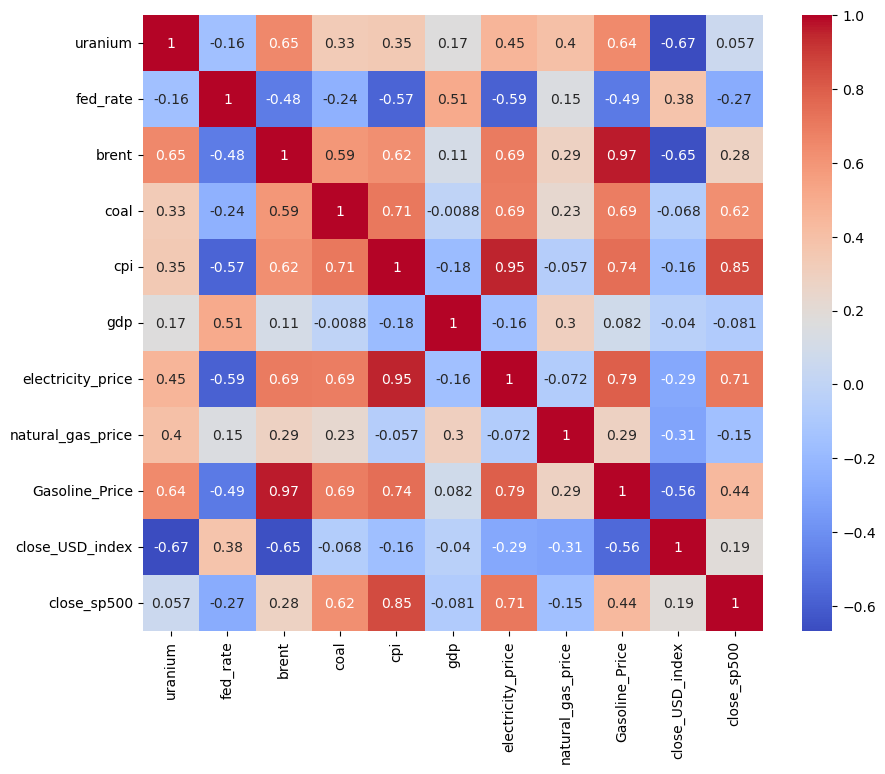

In [20]:
# Create the correlation matrix and represent it as a heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm')
plt.show()


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


C:\Users\matti\AppData\Local\Temp\ipykernel_24992\461762729.py:13: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis='x', nbins=desired_ticks)


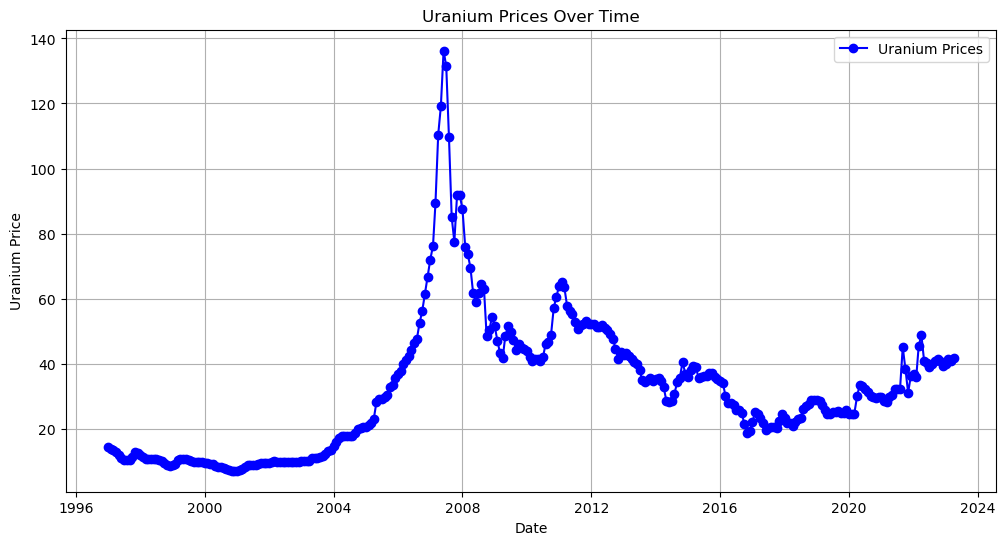

In [22]:
df_final.index = pd.to_datetime(df_final.index)

# Visualize Uranium Prices over time
plt.figure(figsize=(12, 6))
plt.plot(df_final.index, df_final['uranium'], label='Uranium Prices', marker='o', linestyle='-', color='b')
plt.title('Uranium Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Uranium Price')
plt.legend()

# Set x-axis ticks to be the years only with a fixed number of ticks
desired_ticks = 6  # Adjust this based on your preference
plt.locator_params(axis='x', nbins=desired_ticks)

plt.grid(True)
plt.show()

Mean Absolute Error: 9.385305183605993
Mean Square Error: 123.01784270381137
Root Mean Square Error: 11.091340888450384
R-squared: 0.64230629407896


C:\Users\matti\AppData\Local\Temp\ipykernel_24992\2836426391.py:54: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis='x', nbins=desired_ticks)


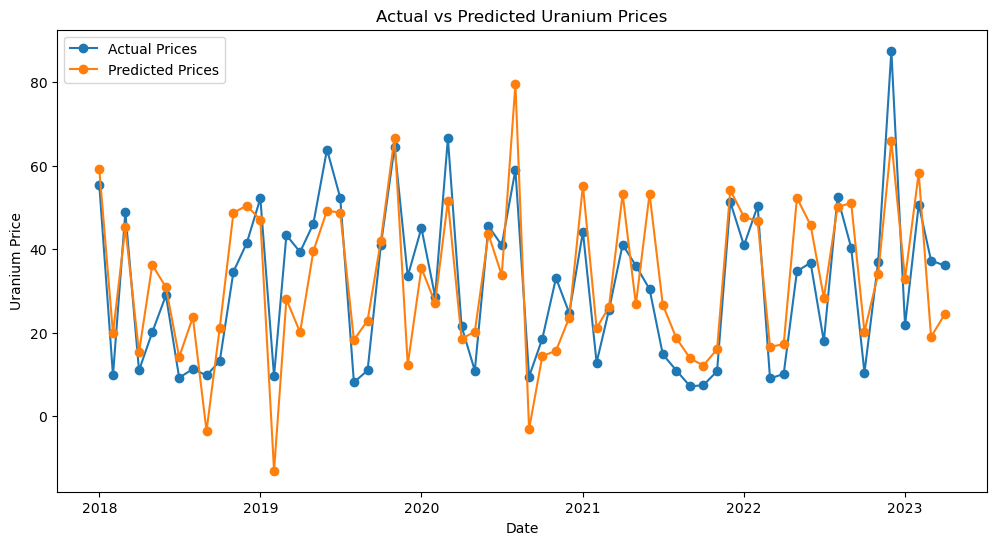

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the independent variables
independent_vars = ['fed_rate', 'natural_gas_price', 'Gasoline_Price', 'close_USD_index', 'close_sp500']
#independent_vars=['fed_rate',  'electricity_price', 'natural_gas_price', 'Gasoline_Price', 'close_USD_index','close_sp500']
# Select the relevant columns for the regression
data = df_final[['uranium'] + independent_vars]

# Drop rows with missing values
data = data.dropna()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[independent_vars], data['uranium'], test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test set
predictions = model.predict(X_test)
# Performance metrics
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = model.score(X_test, y_test)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R-squared:', r2)

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert the index to DateTimeIndex
df_final.index = pd.to_datetime(df_final.index)

# Visualize the results with years on the x-axis
plt.figure(figsize=(12, 6))
plt.plot(df_final.index[-len(y_test):], y_test.values, label='Actual Prices', marker='o')
plt.plot(df_final.index[-len(y_test):], predictions, label='Predicted Prices', marker='o')
plt.title('Actual vs Predicted Uranium Prices')
plt.xlabel('Date')
plt.ylabel('Uranium Price')
plt.legend()

# Set x-axis ticks to be the years only with a fixed number of ticks
desired_ticks = 6  # Adjust this based on your preference
plt.locator_params(axis='x', nbins=desired_ticks)

plt.show()

Predicted Uranium Value for 2024-04-01: 50.6706316128334


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


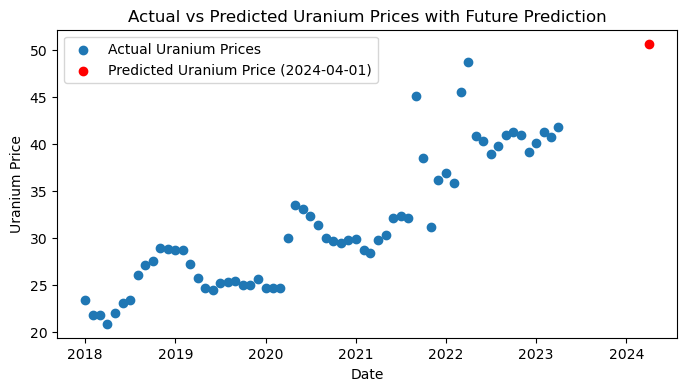

In [24]:
selected_features = ['fed_rate',  'natural_gas_price', 'Gasoline_Price', 'close_USD_index', 'close_sp500']

features = df_final[selected_features]
target = df_final['uranium']

# Step 3: Split the Data
# Assuming you want to use data up to 2022-04-01 for training
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, shuffle=False)

# Step 4: Train the Linear Regression Model
model = LinearRegression()
model.fit(train_features, train_target)

# Step 5: Make Predictions on the Test Set
predictions = model.predict(test_features)

# Step 6: Predict Uranium One Year from Now
future_date_features = df_final.loc['2023-04-01', selected_features].values.reshape(1, -1)
future_uranium_prediction = model.predict(future_date_features)
print("Predicted Uranium Value for 2024-04-01:", future_uranium_prediction[0])


# Plotting the predicted value for 2024-04-01
plt.figure(figsize=(8, 4))
plt.scatter(test_target.index, test_target.values, label='Actual Uranium Prices', marker='o')
plt.scatter(['2024-04-01'], [future_uranium_prediction[0]], label='Predicted Uranium Price (2024-04-01)', color='red', marker='o')
plt.title('Actual vs Predicted Uranium Prices with Future Prediction')
plt.xlabel('Date')
plt.ylabel('Uranium Price')
plt.legend()
plt.show()